<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Yarrowia-models" data-toc-modified-id="Yarrowia-models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Yarrowia models</a></span><ul class="toc-item"><li><span><a href="#Yarrowia-iYLI647-SBML-model-from-Dong-Yup-Lee" data-toc-modified-id="Yarrowia-iYLI647-SBML-model-from-Dong-Yup-Lee-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Yarrowia iYLI647 SBML model from Dong-Yup Lee</a></span></li><li><span><a href="#Yarrowia-iYali4-SBML-Bigg-model-from-Chalmers-GEM" data-toc-modified-id="Yarrowia-iYali4-SBML-Bigg-model-from-Chalmers-GEM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Yarrowia iYali4 SBML Bigg model from <a href="https://github.com/djinnome/Yarrowia_lipolytica_W29-GEM" target="_blank">Chalmers GEM</a></a></span></li><li><span><a href="#iMM904-model" data-toc-modified-id="iMM904-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>iMM904 model</a></span></li></ul></li><li><span><a href="#Map-to-iMM904-Central-carbon-metabolism" data-toc-modified-id="Map-to-iMM904-Central-carbon-metabolism-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Map to iMM904 Central carbon metabolism</a></span><ul class="toc-item"><li><span><a href="#iMM904-central-carbon-metabolism-reactions-missing-in-YALI4" data-toc-modified-id="iMM904-central-carbon-metabolism-reactions-missing-in-YALI4-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>iMM904 central carbon metabolism reactions missing in YALI4</a></span></li><li><span><a href="#YALI4-Missing-metabolites-in-Escher-map" data-toc-modified-id="YALI4-Missing-metabolites-in-Escher-map-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>YALI4 Missing metabolites in Escher map</a></span><ul class="toc-item"><li><span><a href="#FRUK" data-toc-modified-id="FRUK-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><a href="http://bigg.ucsd.edu/models/iMM904/reactions/FRUK" target="_blank">FRUK</a></a></span></li><li><span><a href="#ALCD2x_copy1" data-toc-modified-id="ALCD2x_copy1-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><a href="http://bigg.ucsd.edu/models/iMM904/reactions/ALCD2x" target="_blank">ALCD2x_copy1</a></a></span></li><li><span><a href="#ETOHt:" data-toc-modified-id="ETOHt:-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>ETOHt:</a></span></li><li><span><a href="#ACt2r" data-toc-modified-id="ACt2r-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>ACt2r</a></span></li></ul></li></ul></li></ul></div>

# Yarrowia models

```
 
Hi Jeremy,
 
Some good news – Ed Kerkhoven from Chalmers has been working with Christian Lieven from DTU to add BiGG IDs to their Yarrowia model (https://github.com/ChristianLieven/Yarrowia_lipolytica_W29-GEM/tree/bigg_ids). They regularly post updates and we can link to their latest release for our paper. 
 
Ed and Christian plan to publish an updated model in another paper that is associated with some data that was produced at EMSL awhile ago and I think there is some interest is collaborating with you on visualization as they develop their new model. You can follow-up with Ed directly to assess how you could collaborate.
 
Cheers,
Scott

Hi Scott,
 
That is fantastic news!
 
Ed, what kind of visualizations you are interested in?
 
Sincerely,
 
Jeremy

Hi Jeremy,
 
You're probably aware of Escher (https://escher.github.io/)? It would be nice if the model works with that.
 
Some other curations that we're planning to include are BIGG anntations, Yali1 gene identifiers, curate with reactions from iYLI647 and iMK735, SLIMEr formulation of lipid metabolism (https://bmcsystbiol.biomedcentral.com/articles/10.1186/s12918-018-0673-8), do you have some additional ideas after working with the model?
 
Best, Ed
```



In [1]:
import cobra
import cobra.io
from IPython.display import HTML, display, SVG, Markdown, Image
import os, sys
import pandas as pd
from io import StringIO
import numpy as np
import toolz
import qgrid
from pylab import figure, xlabel, ylabel, title, savefig, gca
import matplotlib
from matplotlib.sankey import Sankey


def rxn_contains_metabolite_p( rxn, mets ):
    return len(set([m.id for m in rxn.metabolites]) & mets) > 0

def rxn_contains_reactant_p( rxn, mets ):
    return len(set([m.id for m in rxn.reactants]) & mets) > 0

def rxn_contains_product_p( rxn, mets ):
    return len(set([m.id for m in rxn.products]) & mets) > 0


def get_producers( met, fluxes ):
    producers = []
    production_flux = {}
    for rxn in met.reactions:
        if ((fluxes[rxn.id] < 0) and (met in rxn.reactants)) or ((fluxes[rxn.id] > 0) and (met in rxn.products)):
            producers.append( rxn )
            production_flux[rxn.id] = abs(fluxes[rxn.id]*rxn.metabolites[met])
    return producers, pd.Series(production_flux)

def get_zero_flux( met, fluxes):
    zeros = []
    for rxn in met.reactions:
        if np.isclose(fluxes[rxn.id],0):
            zeros.append( rxn )
    return zeros

def get_consumers( met, fluxes ):
    consumers = []
    consumption_flux = {}
    for rxn in met.reactions:
        if ((fluxes[rxn.id] > 0) and (met in rxn.reactants)) or ((fluxes[rxn.id] < 0) and (met in rxn.products)):
            consumers.append( rxn )
            consumption_flux[rxn.id] = abs(fluxes[rxn.id]*rxn.metabolites[met])
    return consumers, pd.Series(consumption_flux)

def build_kegg_rxn( rxn ):
    reactants, products = [],[]
    for met, coeff in rxn.metabolites.items():
        if coeff < 0:
            if coeff == -1:
                reactants.append( met.annotation['kegg.compound'])
            else:
                reactants.append( '{} {}'.format( np.abs(coeff), met.annotation['kegg.compound']))
        elif coeff == 1:
            products.append( met.annotation['kegg.compound'])
        else:
            products.append( '{} {}'.format( np.abs(coeff), met.annotation['kegg.compound']))
    kegg_eqn =  '{} = {}'.format(' + '.join( reactants ), ' + '.join( products ) )
    return kegg_eqn
                                 
def rxn_can_produce_met_p( rxn, met ):
    return (rxn.lower_bound < 0 and met in rxn.reactants) or (rxn.upper_bound > 0 and met in rxn.products)

def rxn_can_consume_met_p( rxn, met ):
    return (rxn.lower_bound < 0 and met in rxn.products) or (rxn.upper_bound > 0 and met in rxn.reactants)

def build_rxn_w_compartment( rxn, use_metabolite_names=True ):
    reactants, products = [],[]
    for met, coeff in rxn.metabolites.items():
        if use_metabolite_names:
            met_name_or_id = met.name
        else:
            met_name_or_id = met.id
        if coeff < 0:
            if coeff == -1:
                reactants.append('{}[{}]'.format( met_name_or_id, met.compartment))
            else:
                reactants.append( '{} {}[{}]'.format( np.abs(coeff), met_name_or_id, met.compartment))
        elif coeff == 1:
            products.append( '{}[{}]'.format(met_name_or_id,met.compartment))
        else:
            products.append( '{} {}[{}]'.format( np.abs(coeff), met_name_or_id, met.compartment))
    if rxn.lower_bound < 0 and rxn.upper_bound > 0:
        direction = '<=>'
    elif rxn.lower_bound < 0:
        direction = '<--'
    elif rxn.upper_bound > 0:
        direction = '-->'
    else:
        direction = '--'
    rxn_eqn =  '{} {} {}'.format(' + '.join( reactants ), direction, ' + '.join( products ) )
    return rxn_eqn
                         
        
def summarize( met, fluxes, out=sys.stdout, use_metabolite_names=True, tol = 1e-5 ):
    producers, production_flux = get_producers( met, fluxes )
    production_pct = production_flux/production_flux.sum()*100
    ptitle = '\nTotal Production flux: {} -- {}[{}] ({})\n'.format(production_flux.sum(),
                                                                   met.name, 
                                                                   met.compartment, 
                                                                   met.id)
    pcols = 'Pct\tFlux\tRxn ID\tReaction\tReactionIDs\n'
    out.write(ptitle)
    out.write('-'*len(ptitle) + '\n')
    out.write(pcols)
    out.write('\t'.join(['-'*len(col) for col in pcols.split('\t')]) + '\n')
    
    for producer in producers:
        out.write('{:0.3f}\t{:0.3f}\t{}\t{}\t{}\n'.format( 
            production_pct[producer.id], 
            production_flux[producer.id], 
            producer.id, 
            build_rxn_w_compartment( producer, 
                                     use_metabolite_names=True ),
            build_rxn_w_compartment( producer, 
                                     use_metabolite_names=False)))
    consumers, consumption_flux = get_consumers( met, fluxes )
    consumption_pct = consumption_flux/consumption_flux.sum()*100
    ctitle = '\nTotal Consumption flux: {} -- {}[{}] ({})\n'.format(consumption_flux.sum(), 
                                                                    met.name, met.compartment, met.id)
    ccols = 'Pct\tFlux\tRxn ID\tReaction\tReactionIDs\n'
    out.write(ctitle)
    out.write('-'*len(ctitle) + '\n')
    out.write(ccols)
    out.write('\t'.join(['-'*len(col) for col in ccols.split('\t')]) + '\n')
    
    for consumer in consumers:
        out.write('{:0.3f}\t{:0.3f}\t{}\t{}\t{}\n'.format(consumption_pct[consumer.id], 
                                            consumption_flux[consumer.id], 
                                            consumer.id, 
                                            build_rxn_w_compartment(consumer, 
                                                                    use_metabolite_names=True),
                                            build_rxn_w_compartment(consumer,
                                                                    use_metabolite_names=False)))
    zeros = get_zero_flux( met, fluxes )
    ztitle = '\nTotal number of Zero flux reactions: {}\n'.format(len(zeros))
    zcols = 'Rxn ID\tReaction\tReactionIDs\n'
    out.write(ztitle)
    out.write( '-'*len(ztitle) + '\n')
    out.write(zcols)
    out.write('\t'.join(['-'*len(col) for col in zcols.split('\t')]) + '\n')
    
    for zero in zeros:
        out.write('{}\t{}\t{}\n'.format(    zero.id, 
                                            build_rxn_w_compartment(zero, 
                                                                    use_metabolite_names=True),
                                            build_rxn_w_compartment(zero,
                                                                    use_metabolite_names=False)))

def metabolites_of_gene( model, gene ):
    metabolites = set()
    try:
        for rxn in model.genes.get_by_id(gene).reactions:
            metabolites |= set(rxn.reactants)
            metabolites |= set(rxn.products)
    except KeyError:
        pass
    return metabolites
def reactions_of_proteins( model, proteins ):
    reactions_of_proteins = set()
    for protein in proteins:
        try:
            reactions_of_proteins |= set(model.genes.get_by_id( protein ).reactions )
        except KeyError:
            pass
    return reactions_of_proteins

def metabolites_of_proteins( model, proteins ):
    metabolites_of_measured_proteins = set()
    for protein in proteins:
        metabolites_of_measured_proteins |= metabolites_of_gene( yarrowia, protein )
    return metabolites_of_measured_proteins

def all_reactions_of_metabolites( model, metabolites, reactions ):
    all_rxns_of_metabolites = set()
    for metabolite in metabolites:
        if len(metabolite.reactions) == len(metabolite.reactions & reactions):
            all_rxns_of_metabolites.add( metabolite )
    return all_rxns_of_metabolites



## Yarrowia iYLI647 SBML model from Dong-Yup Lee

In [5]:
import libsbml
#r = libsbml.SBMLReader()
#d = r.readSBML(os.path.join('../iYLI647/12918_2018_542_MOESM2_ESM.xml'))
#d.getNumErrors()
#d.getError(0).getLine()
yli647 = cobra.io.read_sbml_model(os.path.join('ModelFiles/xml/iYLI647.xml'))
yli647.optimize()

,fluxes,reduced_costs
13BGH,0.000000,-5.294233e-02
13BGHe,0.000000,-2.775558e-17
ASADi,0.121794,0.000000e+00
2DDA7Ptm,0.000000,-0.000000e+00
2DHPtm,0.000000,0.000000e+00
...,...,...
FAO40p,0.000000,-2.775558e-17
LEUDH,2.019779,-3.469447e-18
MBCOAi,2.019779,1.301043e-18
MCCC,2.019779,1.170938e-17


In [ ]:
yli647.reactions.biomass_carbon_limiting

In [ ]:
yli647.metabolites.nadph_c.summary()

In [ ]:
yli647.metabolites.nadph_m.summary()

## Yarrowia iYali4 SBML Bigg model from [Chalmers GEM](https://github.com/djinnome/Yarrowia_lipolytica_W29-GEM)

In [12]:

mdir = 'ModelFiles'
jdir = os.path.join(mdir, 'json')
xdir = os.path.join(mdir, 'xml')
os.listdir('.')
yali4_model = cobra.io.read_sbml_model(os.path.join(xdir,'iYali4.bigg.xml' ))
cobra.io.save_json_model(yali4_model,os.path.join(jdir, 'iYali4.bigg.json'))
yali4_fluxes = yali4_model.optimize().to_frame().fluxes
yali4_fluxes

xAMINOACID      1.056916e-01
xBIOMASS        1.056916e-01
xLIPID          1.056916e-04
xMAINTENANCE    0.000000e+00
xPOOL_AC_EM     1.194860e-02
xPOOL_AC_LP     0.000000e+00
xPOOL_AC_MM     0.000000e+00
xPOOL_FA_EM     0.000000e+00
xPOOL_FA_EN     0.000000e+00
xPOOL_FA_LP     3.503050e-04
xPOOL_FA_MI     0.000000e+00
xPOOL_FA_MM     0.000000e+00
y000001         0.000000e+00
y000002         0.000000e+00
y000004         0.000000e+00
y000005         4.666286e-02
y000006         0.000000e+00
PRMICI          1.564236e-02
y000008         5.020459e-03
y000009         0.000000e+00
y000010         0.000000e+00
P5CDm           0.000000e+00
DKMPPD2         0.000000e+00
y000014         0.000000e+00
y000015         0.000000e+00
ACHBSm          2.219525e-02
y000017         0.000000e+00
AATA            3.530101e-02
DPR             0.000000e+00
DDPAm           4.481326e-02
                    ...     
y300052         0.000000e+00
y300054         0.000000e+00
y300055         0.000000e+00
y300056       

## iMM904 model

In [17]:
imm904_model = cobra.io.load_json_model(os.path.join(jdir, 'iMM904.json'))
imm904_fluxes = imm904_model.optimize().to_frame().fluxes
imm904_fluxes

13BGH                  0.000000
13BGHe                 0.000000
13GS                   0.326670
16GS                   0.000000
23CAPPD                0.000000
2DDA7Ptm               0.000000
2DHPtm                 0.000000
2DOXG6PP               0.000000
2HBO                   0.000000
2HBt2                  0.000000
2HMHMBQMTm             0.000000
2HP6MPMOm              0.000000
2HPMBQMTm              0.000000
2HPMMBQMOm             0.000000
2MBACt                 0.000000
2MBALDt                0.000000
2MBALDtm               0.000000
2MBTOHt                0.000000
2MBTOHtm               0.000000
2MPPALt                0.000000
2MPPALtm               0.000000
2OBUTtm                0.055472
2OXOADPtim             0.082387
2PHETOHt               0.000000
2PHETOHtm              0.000000
34HPLFM                0.000000
34HPPOR                0.000000
34HPPt2m               0.000000
34HPPt2p               0.000000
3C3HMPt                0.000000
                         ...   
URAt2   

# Map to iMM904 Central carbon metabolism

In [93]:
import json
with open('iMM904.Central carbon metabolism.json') as imm904_map_f:
    imm904_map = json.load(imm904_map_f)
imm904_map[0]

{'map_name': 'iMM904.Central carbon metabolism',
 'map_id': '78086bfdab8ac8a8150cf4cd5dada037',
 'map_description': 'Yeast central carbon metabolism\nLast Modified Wed May 08 2019 00:17:42 GMT-0700 (Pacific Daylight Time)',
 'homepage': 'https://escher.github.io',
 'schema': 'https://escher.github.io/escher/jsonschema/1-0-0#'}

In [15]:
import escher
reaction_scale = [ { 'type': 'min',  'color': '#c8c8c8', 'size': 12 },
                   { 'type': 'mean', 'color': '#9696ff', 'size': 20 },
                   { 'type': 'max',  'color': '#0000ff', 'size': 25 } ]
reaction_no_data_color = '#ff0000'
escher.Builder( map_json       = 'iMM904.Central carbon metabolism.json',
                model          = yali4_model,
                reaction_data  = yali4_fluxes.to_dict(),
                reaction_scale = reaction_scale,
                reaction_no_data_color = reaction_no_data_color
              ).display_in_notebook()

## iMM904 central carbon metabolism reactions missing in YALI4 

*	[FRUK](#FRUK):  f16_c and fdp_c have no other reactions.
*	[ALCD2x_copy1](#ALCD2x_copy1)   iMM904 had two copies of this reaction for no good reason.  ACLD2ir is the correct reaction in yarrowia.  Will replace in the map
*	[ETOHt](#ETOHt):   y001762 (etoh_c[c] <=> etoh_e[e])  is the equivalent reaction in YALI4. Is there any reason not to rename this reaction to ETOHt?
* [ACt2r](#ACt2r): Closest reaction is y001106 but no proton symport and very different GPR
* [ACtm](#ACtm)
* [MALt2r](#MALt2r)
* [CITt2r](#CITt2r)
* [ACONTm](#ACONTm)
* [SUCD1m](#SUCD1m)
* [SUCFUMtm](#SUCFUMtm)
* [FUMt2r](#FUMt2r)
* [SUCOASm](#SUCOASm)
* [AKGDbm](#AKGDbm)
* [GCC2cm_copy1](#GCC2cm_copy1)
* [AKGDam](#AKGDam)
* [CO2t](#CO2t)

## 	YALI4 Missing metabolites in Escher map
* [sdhlam_m](#sdhlam): S Succinyldihydrolipoamide C12H20NO4S2

In [ ]:
%matplotlib inline
import escher

In [72]:
def get_mets_from_map(json):
    metabolites = set()
    for node, rxn in json[1]['reactions'].items():
        for participant in rxn['metabolites']:
            metabolites.add(participant['bigg_id'])
    return metabolites

imm904_mets = get_mets_from_map( imm904 )
imm904_mets - set([met.id for met in yarrowia.metabolites])

{'sdhlam_m'}

In [ ]:
build_rxn_w_compartment(yarrowia.reactions.xBIOMASS)

In [ ]:
yarrowia.reactions.xPOOL_AC_EM.build_reaction_string(use_metabolite_names=True)

In [ ]:
yarrowia.reactions.xPOOL_AC_LP.build_reaction_string(use_metabolite_names=True)

In [ ]:
yarrowia.reactions.xPOOL_AC_MM.build_reaction_string(use_metabolite_names=True)

In [ ]:
yarrowia.reactions.xPOOL_FA_EM.build_reaction_string(use_metabolite_names=True)

In [ ]:
yarrowia.reactions.xPOOL_FA_MM.build_reaction_string(use_metabolite_names=True)

In [ ]:
yarrowia.reactions.xLIPID.build_reaction_string(use_metabolite_names=True)

### [FRUK](http://bigg.ucsd.edu/models/iMM904/reactions/FRUK)

FRUK:  f16_c and fdp_c have no other reactions.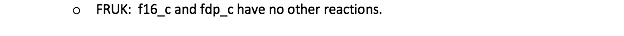

In [98]:
imm904_model.reactions.FRUK

Reaction identifier,FRUK
Name,Fructose-1-phosphate kinase
Memory address,0x01327f59940
Stoichiometry,"atp_c + f1p_c --> adp_c + fdp_c + h_c ATP C10H12N5O13P3 + D-Fructose 1-phosphate --> ADP C10H12N5O10P2 + D-Fructose 1,6-bisphosphate + H+"
GPR,
Lower bound,0.0
Upper bound,999999.0


In [90]:
summarize( yarrowia.metabolites.fdp_c, fluxes.fluxes)


Total Production flux: 0.6439816936823061 -- D-fructose 1,6-bisphosphate[c] (fdp_c)
-------------------------------------------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------
100.000	0.644	PFK	ATP[c] + D-fructose 6-phosphate[c] --> ADP[c] + D-fructose 1,6-bisphosphate[c] + H+[c]	atp_c[c] + f6p_c[c] --> adp_c[c] + fdp_c[c] + h_c[c]

Total Consumption flux: 0.6439816936823061 -- D-fructose 1,6-bisphosphate[c] (fdp_c)
--------------------------------------------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------
100.000	0.644	FBA	D-fructose 1,6-bisphosphate[c] <=> dihydroxyacetone phosphate[c] + glyceraldehyde 3-phosphate[c]	fdp_c[c] <=> dhap_c[c] + g3p_c[c]

Total number of Zero flux reactions: 1
----------------------------------------
Rxn ID	Reaction	ReactionIDs
------	--------	------------
FBP	D-fructose 1,6-bisphosphate[c] + H2O[c] --> D-fructose 6-

In [89]:
summarize( yarrowia.metabolites.f1p_c, fluxes.fluxes)


Total Production flux: 0.0 -- D-fructose 1-phosphate[c] (f1p_c)
-----------------------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total Consumption flux: 0.0 -- D-fructose 1-phosphate[c] (f1p_c)
------------------------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total number of Zero flux reactions: 1
----------------------------------------
Rxn ID	Reaction	ReactionIDs
------	--------	------------
FBA2	D-fructose 1-phosphate[c] <=> dihydroxyacetone phosphate[c] + D-glyceraldehyde[c]	f1p_c[c] <=> dhap_c[c] + glyald_c[c]


### [ALCD2x_copy1](http://bigg.ucsd.edu/models/iMM904/reactions/ALCD2x)

ALCD2x_copy1:   iMM904 had two copies of this reaction for no good reason.  ACLD2ir is the correct reaction in yarrowia.  Will replace in the map

In [99]:
imm904_model.reactions.ALCD2x_copy1

Reaction identifier,ALCD2x_copy1
Name,Alcohol dehydrogenase (ethanol)
Memory address,0x01328413e80
Stoichiometry,etoh_c + nad_c --> acald_c + h_c + nadh_c Ethanol + Nicotinamide adenine dinucleotide --> Acetaldehyde + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,YMR303C
Lower bound,0.0
Upper bound,999999.0


In [92]:
summarize( yarrowia.metabolites.etoh_c, fluxes.fluxes)


Total Production flux: 0.0 -- ethanol[c] (etoh_c)
---------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total Consumption flux: 0.0 -- ethanol[c] (etoh_c)
----------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total number of Zero flux reactions: 5
----------------------------------------
Rxn ID	Reaction	ReactionIDs
------	--------	------------
ALCD2ir	ethanol[c] + NAD[c] --> acetaldehyde[c] + H+[c] + NADH[c]	etoh_c[c] + nad_c[c] --> acald_c[c] + h_c[c] + nadh_c[c]
y000369	H2O[c] + ethyl acetate[c] --> acetate[c] + ethanol[c] + H+[c]	h2o_c[c] + s_0685[c] --> ac_c[c] + etoh_c[c] + h_c[c]
y002115	acetaldehyde[c] + H+[c] + NADH[c] --> ethanol[c] + NAD[c]	acald_c[c] + h_c[c] + nadh_c[c] --> etoh_c[c] + nad_c[c]
y001762	ethanol[c] <=> ethanol[e]	etoh_c[c] <=> etoh_e[e]
ETOHtm	ethanol[c] <=> ethanol[m]	etoh_c[c] <=> etoh_m[m]


### [ETOHt](http://bigg.ucsd.edu/models/iMM904/reactions/ETOHt) 

ETOHt:   y001762 (etoh_c[c] <=> etoh_e[e])  is the equivalent reaction in YALI4. Is there any reason not to rename this reaction to ETOHt?

In [100]:
imm904_model.reactions.ETOHt

Reaction identifier,ETOHt
Name,Ethanol reversible transport
Memory address,0x01328351780
Stoichiometry,etoh_e <=> etoh_c Ethanol <=> Ethanol
GPR,
Lower bound,-999999.0
Upper bound,999999.0


In [91]:
summarize( yarrowia.metabolites.etoh_c, fluxes.fluxes)


Total Production flux: 0.0 -- ethanol[c] (etoh_c)
---------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total Consumption flux: 0.0 -- ethanol[c] (etoh_c)
----------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total number of Zero flux reactions: 5
----------------------------------------
Rxn ID	Reaction	ReactionIDs
------	--------	------------
ALCD2ir	ethanol[c] + NAD[c] --> acetaldehyde[c] + H+[c] + NADH[c]	etoh_c[c] + nad_c[c] --> acald_c[c] + h_c[c] + nadh_c[c]
y000369	H2O[c] + ethyl acetate[c] --> acetate[c] + ethanol[c] + H+[c]	h2o_c[c] + s_0685[c] --> ac_c[c] + etoh_c[c] + h_c[c]
y002115	acetaldehyde[c] + H+[c] + NADH[c] --> ethanol[c] + NAD[c]	acald_c[c] + h_c[c] + nadh_c[c] --> etoh_c[c] + nad_c[c]
y001762	ethanol[c] <=> ethanol[e]	etoh_c[c] <=> etoh_e[e]
ETOHtm	ethanol[c] <=> ethanol[m]	etoh_c[c] <=> etoh_m[m]


### ACt2r

In [20]:
imm904_model.reactions.ACt2r

Reaction identifier,ACt2r
Name,Acetate reversible transport via proton symport
Memory address,0x01320d4c6d8
Stoichiometry,ac_e + h_e <=> ac_c + h_c Acetate + H+ <=> Acetate + H+
GPR,YCR032W
Lower bound,-999999.0
Upper bound,999999.0


In [21]:
summarize(yali4_model.metabolites.ac_e, yali4_fluxes)


Total Production flux: 0.0 -- acetate[e] (ac_e)
-------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total Consumption flux: 0.0 -- acetate[e] (ac_e)
--------------------------------------------------
Pct	Flux	Rxn ID	Reaction	ReactionIDs
---	----	------	--------	------------

Total number of Zero flux reactions: 2
----------------------------------------
Rxn ID	Reaction	ReactionIDs
------	--------	------------
y001106	acetate[c] <=> acetate[e]	ac_c[c] <=> ac_e[e]
EX_ac_e	acetate[e] --> 	ac_e[e] --> 


In [22]:
yali4_model.reactions.y001106

Reaction identifier,y001106
Name,acetate transport
Memory address,0x0131fe7c710
Stoichiometry,ac_c <=> ac_e acetate <=> acetate
GPR,YALI1_C32119g or YALI1_C32609g or YALI1_E15804g or YALI1_E32315g or YALI1_F17569g or YALI1_F21728g
Lower bound,-1000.0
Upper bound,1000.0
